# Loading Libraries and data set

In [1]:
import re
import nltk
import string
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth",200)

In [2]:
train = pd.read_csv('Twitter_Train.csv')

In [3]:
test = pd.read_csv('Twitter_Test.csv')

In [4]:
print('Train set has {} tweets and test set has {} tweets'.format(train.shape[0],test.shape[0]))
print("Out of the total {} tweets {} are positive tweets and {} are negative tweets".format(train.shape[0],len(train[train['label'] == 0].value_counts()),len(train[train['label'] == 1].value_counts())))

Train set has 31962 tweets and test set has 17197 tweets
Out of the total 31962 tweets 29720 are positive tweets and 2242 are negative tweets


# Data Cleaning

In [5]:
merge = train.append(test, ignore_index = True) # we will merge both the dataset for preprocessing

In [6]:
merge.shape 

(49159, 3)

In [7]:
merge.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [8]:
merge['clean_tweet'] = merge['tweet'].str.replace("[^a-zA-Z#]"," ") #cleaning dataset

<ipython-input-8-14fea3a5fddb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merge['clean_tweet'] = merge['tweet'].str.replace("[^a-zA-Z#]"," ") #cleaning dataset


In [9]:
#Removing words having count less than 3
merge['clean_tweet'] = merge['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [10]:
merge.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [11]:
tokenized_tweet = merge['clean_tweet'].apply(lambda x:x.split()) #tokenizing

In [12]:
tokenized_tweet.head()

0                      [user, when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [user, user, thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                 [bihday, your, majesty]
3                                                                        [#model, love, take, with, time]
4                                                                      [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [13]:
#from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

In [14]:
#stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [15]:
#from nltk import wordnet
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) #lemmatization

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

In [17]:
merge['clean_tweet'] = tokenized_tweet

In [18]:
merge.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when father dysfunctional selfish drag kid into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# Story Generation and Visualisation from Tweets

In [19]:
all_words = " ".join([text for text in merge['clean_tweet']])

In [20]:
all_words

'user when father dysfunctional selfish drag kid into dysfunction #run user user thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked bihday your majesty #model love take with time factsguide society #motivation huge fare talking before they leave chaos dispute when they there #allshowandnogo user camping tomorrow user user user user user user user danny next school year year exam think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl love land #allin #cavs #champions #cleveland #clevelandcavaliers user user welcome here #ireland consumer price index climbed from previous #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love daddy today day #gettingfed user #cnn call #michigan middle school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins ouch junior angry #got #junior #yugyoem #o

In [21]:
from wordcloud import WordCloud

In [22]:
wordcloud = WordCloud(width = 800, height = 500,random_state = 21,max_font_size = 110).generate(all_words)

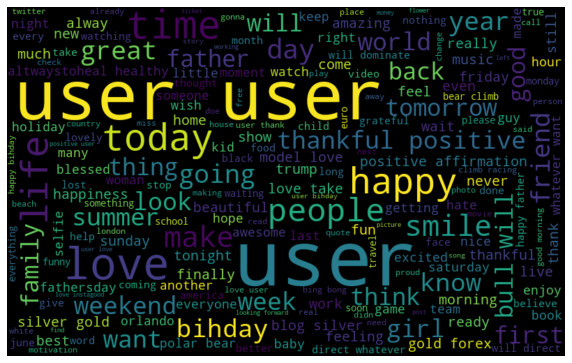

In [23]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [24]:
normal_words = " ".join([text for text in merge['clean_tweet'][merge['label']==0]])

In [25]:
wordcloud = WordCloud(width = 800, height = 500,random_state = 21,max_font_size = 110).generate(normal_words)

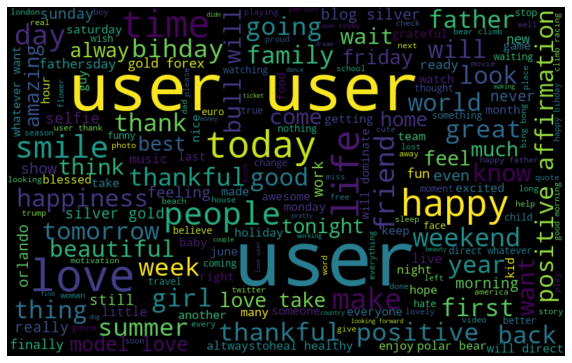

In [26]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [27]:
negative_words = " ".join([text for text in merge['clean_tweet'][merge['label']==1]])

In [28]:
wordcloud = WordCloud(width = 800, height = 500,random_state = 21,max_font_size = 110).generate(negative_words)

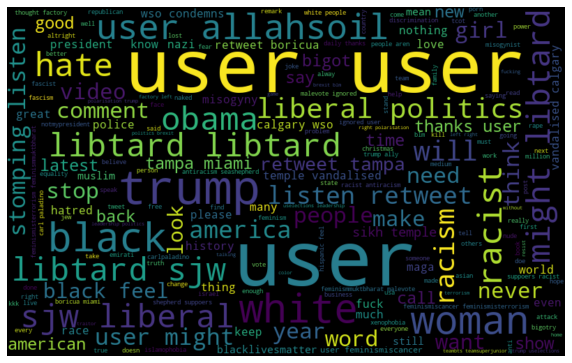

In [29]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [30]:
#functions to collect hashtag
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [31]:
ht_regular = hashtag_extract(merge['clean_tweet'][merge['label']==0])

In [32]:
ht_negative = hashtag_extract(merge['clean_tweet'][merge['label']==1])

In [33]:
ht_regular = sum(ht_regular,[])

In [34]:
ht_negative = sum(ht_negative,[])

In [35]:
a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'hashtag':list(a.keys()),'Count':list(a.values())})

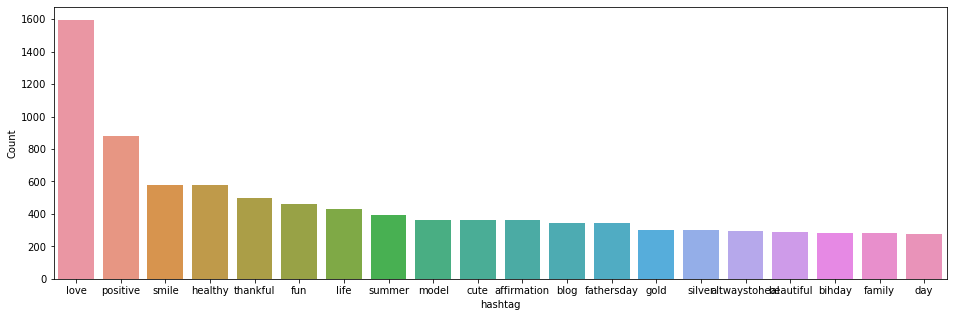

In [36]:
d = d.nlargest(columns ='Count',n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data = d,x = 'hashtag',y = 'Count')
ax.set(ylabel = 'Count')
plt.show()

In [37]:
b = nltk.FreqDist(ht_negative)
e = pd.DataFrame({'hashtag':list(b.keys()),'Count':list(b.values())})

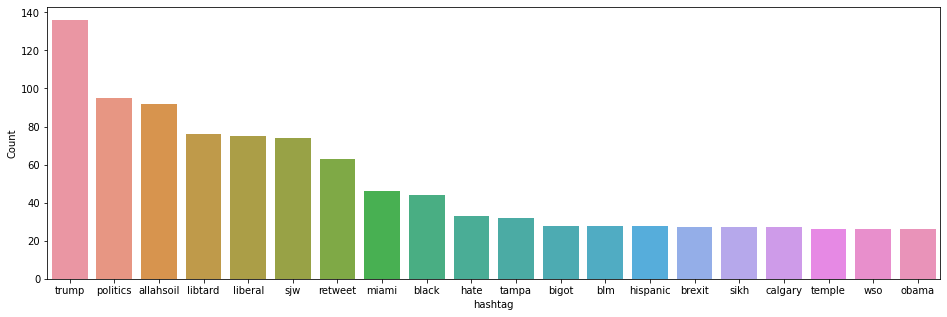

In [38]:
e = e.nlargest(columns ='Count',n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data = e,x = 'hashtag',y = 'Count')
ax.set(ylabel = 'Count')
plt.show()

# Bag-Of-Words Features

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [40]:
bow_vectorizer= CountVectorizer(max_df = 0.90,min_df = 2,max_features = 1000,stop_words = 'english')

In [41]:
bow = bow_vectorizer.fit_transform(merge['clean_tweet'])

In [42]:
bow.shape

(49159, 1000)

# TF-IDF Features

In [43]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90,min_df = 2,max_features=1000,stop_words = 'english')

In [44]:
tfidf = tfidf_vectorizer.fit_transform(merge['clean_tweet'])

In [45]:
tfidf.shape

(49159, 1000)

# Word2Vec Features

In [46]:
tokenized_tweet = merge['clean_tweet'].apply(lambda x:x.split())

In [47]:
model_w2v = gensim.models.Word2Vec(tokenized_tweet,
                                  vector_size=200,
                                  window=5,
                                  min_count = 2,
                                  sg = 1,
                                  hs = 0,
                                  negative = 10,
                                  workers = 2,
                                  seed = 34)

In [48]:
model_w2v.train(tokenized_tweet,total_examples = len(merge['clean_tweet']),epochs = 20)

(6585523, 8077800)

In [49]:
model_w2v.wv.most_similar(positive = 'dinner')

[('spaghetti', 0.5726602077484131),
 ('desse', 0.5710585117340088),
 ('#cellar', 0.5643176436424255),
 ('#avocado', 0.5520221590995789),
 ('favs', 0.5513203740119934),
 ('#dnd', 0.5494106411933899),
 ('noodle', 0.5437496304512024),
 ('cookout', 0.5385016202926636),
 ('melanie', 0.5379900932312012),
 ('kayaking', 0.5379619002342224)]

In [50]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5609370470046997),
 ('unfavorability', 0.5510442852973938),
 ('chopra', 0.5449071526527405),
 ('hillary', 0.5411730408668518),
 ('deepak', 0.5392708778381348),
 ('phony', 0.5368560552597046),
 ('unstable', 0.5336968302726746),
 ('irrefutable', 0.5222010016441345),
 ('unfit', 0.5184234380722046),
 ('businessman', 0.5175139904022217)]

In [51]:
model_w2v.wv['trump']

array([ 5.2835190e-01, -8.4800822e-01, -1.7164215e-01, -4.0445662e-01,
       -3.5310620e-01, -1.6148967e-01, -4.7308728e-01, -1.0942747e-02,
        5.4249275e-01,  7.1251881e-01, -5.8039796e-01, -2.2428843e-01,
       -5.0954986e-01, -1.0366861e+00, -3.7251592e-01,  5.9665561e-01,
        4.9719268e-01, -4.1909363e-02, -1.5509272e-01,  2.1494071e-01,
       -4.4086301e-01,  3.1690475e-01, -9.5856048e-02,  5.5502093e-01,
       -7.5509501e-01,  5.6676175e-02,  3.6875689e-01, -3.1917140e-01,
       -7.9112595e-01,  1.0244150e-01,  9.8396188e-01,  1.7696881e-01,
        1.0820840e-01,  5.4920852e-02, -1.6799559e-01, -4.1055556e-02,
        3.9483154e-01, -2.4267270e-01, -3.7084766e-02, -7.9261130e-01,
       -4.0794808e-01,  7.2655745e-02, -2.5967535e-01,  1.9139948e-01,
        3.7113879e-02, -2.8806481e-01,  3.6443049e-01,  9.2257863e-01,
       -2.0693728e-01,  8.9544284e-01, -9.2172757e-02, -4.2890295e-02,
       -2.4089369e-01,  4.7468594e-01, -1.7582084e-01,  2.3423329e-01,
      

# Avg Word2Vec Features

In [52]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [53]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)

In [54]:
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

# Logistic Regression

### Bag-of-words features

In [55]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [56]:
from sklearn.model_selection import train_test_split
xtrain_bow,xvalid_bow,ytrain,yvalid = train_test_split(train_bow,train['label'],random_state = 0,test_size =0.3)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lreg = LogisticRegression()

In [59]:
lreg.fit(xtrain_bow,ytrain)

LogisticRegression()

In [61]:
prediction = lreg.predict_proba(xvalid_bow)

In [62]:
prediction_int = prediction[:,1] >= 0.3

In [63]:
prediction_int = prediction_int.astype(np.int)

In [64]:
from sklearn.metrics import f1_score

In [65]:
f1_score(yvalid,prediction_int)

0.5252707581227436

In [66]:
test_pred = lreg.predict_proba(test_bow)

In [67]:
test_pred_int = test_pred[:,1]>=0.3

In [68]:
test_pred_int = test_pred_int.astype(np.int)

In [69]:
test['label'] = test_pred_int

In [70]:
submission = test[['id','label']]

In [72]:
submission.to_csv('sub_lreg_bow.csv',index = False)

### TF-IDF

In [73]:
train_tfidf = tfidf[:31962,:]

In [74]:
test_tfidf = tfidf[31962:,:]

In [75]:
xtrain_tfidf = train_tfidf[ytrain.index]

In [76]:
xvalid_tfidf = train_tfidf[yvalid.index]

In [77]:
lreg.fit(xtrain_tfidf, ytrain)

LogisticRegression()

In [78]:
prediction = lreg.predict_proba(xvalid_tfidf)

In [79]:
prediction_int = prediction[:,1]>= 0.3

In [80]:
prediction_int = prediction_int.astype(np.int)

In [81]:
f1_score(yvalid,prediction_int)

0.5330848089468778

### Avg - Word2Vec

In [82]:
train_w2v = wordvec_df.iloc[:31962,:]

In [83]:
test_w2v = wordvec_df.iloc[31962:,:]

In [84]:
xtrain_w2v = train_w2v.iloc[ytrain.index,:]

In [85]:
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [86]:
lreg.fit(xtrain_w2v, ytrain)

LogisticRegression()

In [87]:
prediction= lreg.predict_proba(xvalid_w2v)

In [88]:
prediction_int = prediction[:,1]>=0.3

In [89]:
prediction_int = prediction_int.astype(np.int)

In [90]:
f1_score(yvalid,prediction_int)

0.6099290780141843

# SVM

### Bag of Words

In [91]:
from sklearn import svm

In [92]:
svc = svm.SVC(kernel = 'linear', C=1, probability = True).fit(xtrain_bow,ytrain)

In [93]:
svc

SVC(C=1, kernel='linear', probability=True)

In [94]:
prediction = svc.predict_proba(xvalid_bow)

In [95]:
prediction_int = prediction[:,1]>=0.3

In [96]:
prediction_int = prediction_int.astype(np.int)

In [97]:
f1_score(yvalid,prediction_int)

0.5121713729308666

In [98]:
test_pred = svc.predict_proba(test_bow)

In [99]:
test_pred_int = test_pred[:,1] >= 0.3

In [100]:
test_pred_int = test_pred_int.astype(np.int)

In [101]:
test['label'] = test_pred_int

In [102]:
submission = test[['id','label']]

In [103]:
submission.to_csv('sub_svm_bow.csv',index = False)

### TF-IDF

In [104]:
svc = svm.SVC(kernel='linear',C=1,probability = True).fit(xtrain_tfidf,ytrain)

In [105]:
prediction = svc.predict_proba(xvalid_tfidf)

In [106]:
prediction_int = prediction[:,1]>=0.3

In [107]:
prediction_int = prediction_int.astype(np.int)

In [108]:
f1_score(yvalid,prediction_int)

0.48799999999999993

### Avg- Word2Vec

In [109]:
svc = svm.SVC(kernel = 'linear',C=1,probability = True).fit(xtrain_w2v,ytrain)

In [110]:
prediction = svc.predict_proba(xvalid_w2v)

In [111]:
prediction_int = prediction[:,1] >=0.3

In [112]:
prediction_int = prediction_int.astype(np.int)

In [113]:
f1_score(yvalid,prediction_int)

0.6161369193154034

# XGBoost

### Bag Of Words

In [114]:
from xgboost import XGBClassifier

In [140]:
xgb_bow_model = XGBClassifier(max_depth = 6,n_estimators = 1000).fit(xtrain_bow,ytrain)

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [116]:
prediction = xgb_bow_model.predict(xvalid_bow)

In [117]:
f1_score(yvalid,prediction)

0.5273437499999999

In [118]:
test_pred = xgb_bow_model.predict(test_bow)

In [119]:
test['label'] = test_pred

In [120]:
submission = test[['id','label']]

In [121]:
submission.to_csv('sub_xgb_bow.csv')

### TF-IDF Features

In [141]:
xgb_tfidf_model = XGBClassifier(max_depth = 6,n_estimators = 1000).fit(xtrain_tfidf,ytrain)

[17:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [123]:
prediction = xgb_tfidf_model.predict(xvalid_tfidf)

In [124]:
f1_score(yvalid,prediction)

0.5368620037807184

### Avg Word2Vec

In [142]:
xgb_w2v_model = XGBClassifier(max_depth = 6,n_estimators = 1000,nthread = 3).fit(xtrain_w2v,ytrain)

[17:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [126]:
prediction = xgb_w2v_model.predict(xvalid_w2v)

In [127]:
f1_score(yvalid,prediction)

0.6843601895734597

In [143]:
xgb_w2v_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=3, nthread=3, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [144]:
xgb_w2v_model.save_model("model.json")

In [1]:
import pickle

In [146]:
filename = 'finalized_model.sav'
pickle.dump(xgb_w2v_model, open(filename, 'wb'))

In [147]:
pickle.dump(xgb_w2v_model, open('finalized_model.pkl','wb'))

In [148]:
pickle.dump(model_w2v, open('w2v_model.pkl','wb'))

In [66]:
clf = pickle.load(open('finalized_model.pkl', 'rb'))
cv = pickle.load(open('w2v_model.pkl', 'rb'))